# More K-Fold CV 
## CMSE 381 - Fall 2023
## Oct 6,  2023. Lecture 14



In [4]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error

# 1. Setting $k$-fold up on a slightly more complicated data set. 

Ok, let's see how we can use $k$-fold CV for determining hyperparameters. Below, we're going to generate a data set that is clearly non-linear. 

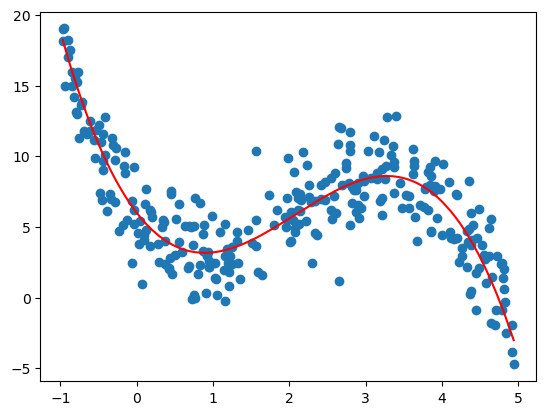

In [5]:
# Set the seed so everyone has the same numbers
np.random.seed(42)

def f(t, m1 = -7,m2 = 5, m3 = -.8, b = 6):
    return m3 * t**3 + m2*t**2 + m1*t+b

n = 300
X_toy = np.random.uniform(-1,5,n)
y_toy = f(X_toy) + np.random.normal(0,2,n)

plt.scatter(X_toy,y_toy)


# Doing this so the plot isn't ugly
X_plot = X_toy.copy()
X_plot.sort()
plt.plot(X_plot,f(X_plot),c = 'red')


X_toy = X_toy.reshape(-1,1)
y_toy = y_toy.reshape(-1,1)



To do this, we are going to set up a polynomial model. For a fixed degree $p$, we want to use the model 
$$y = \beta_0 + \beta_1 X+ \beta_2 X^2+ \cdots+ \beta_p X^p$$

Before messing with this on our big data set, let's see how we can trick linear regression into doing our work for us. 
Take a look at my silly input data.

In [6]:
X = np.arange(10).reshape(-1,1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

&#9989; **<font color=red>Do this:</font>** Given this input data, what is each column in the following matrix?

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
p = 4
poly = PolynomialFeatures(p)
X_powers = poly.fit_transform(X)

X_powers

#This version might be easier to read, uncomment if it helps
X_powers.astype(int)

array([[   1,    0,    0,    0,    0],
       [   1,    1,    1,    1,    1],
       [   1,    2,    4,    8,   16],
       [   1,    3,    9,   27,   81],
       [   1,    4,   16,   64,  256],
       [   1,    5,   25,  125,  625],
       [   1,    6,   36,  216, 1296],
       [   1,    7,   49,  343, 2401],
       [   1,    8,   64,  512, 4096],
       [   1,    9,   81,  729, 6561]])

&#9989; **<font color=red>Do this:</font>** What did I change from the above code? What is different about the output matrix? 

In [9]:
p = 4
poly = PolynomialFeatures(p, include_bias=False)
X_powers = poly.fit_transform(X)

X_powers

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03]])

The trick in all this is that if I pass in this matrix to linear regression, the resulting model learned is exactly the model 
$$y = \beta_0 + \beta_1 X+ \beta_2 X^2+ \cdots+ \beta_p X^p$$
we wanted to use earlier so long as I line up the coefficients properly. 

&#9989; **<font color=red>Do this:</font>** For the original $X_{toy}$ data set, use all of the data to train a polynomial model with $p=3$ to predict $y$. What is the equation of the model learned, including all the values for the coefficients? 


In [10]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_poly = poly.fit_transform(X_toy)

model = LinearRegression()
model.fit(X_poly, y_toy)

coefficients = model.coef_[0]
intercept = model.intercept_[0]

print(f"y = {intercept:.4f} + {coefficients[1]:.4f}X + {coefficients[2]:.4f}X² + {coefficients[3]:.4f}X³")

y = 5.8372 + -6.7054X + 4.8658X² + -0.7811X³


&#9989; **<font color=red>Do this:</font>** Copy your code from above and modify it to use $k$-fold cross validation for $k=5$ to approximate the test error with a degree $p=3$ model. 


*Hint: You have easy-mode code from last class that involved the `cross_val_score` command that would be super useful here.*

In [11]:
from sklearn.model_selection import cross_val_score

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_toy)

mse_scores = -cross_val_score(LinearRegression(), X_poly, y_toy,
                             scoring='neg_mean_squared_error', cv=5)

print(f"5-Fold CV MSE: {mse_scores.mean():.4f} (±{mse_scores.std():.4f})")

5-Fold CV MSE: 3.9308 (±0.8488)


&#9989; **<font color=red>Do this:</font>** Using $k$-fold cross validation for $k=5$, set up code to approximate the test error for each of the polynomial models below. 
- $y = \beta_0 + \beta_1 X$
- $y = \beta_0 + \beta_1 X + \beta_2 X^2$
- $y = \beta_0 + \beta_1 X+ \beta_2 X^2+ \beta_3 X^3$
- $y = \beta_0 + \beta_1 X+ \beta_2 X^2+ \beta_3 X^3+ \beta_4 X^4$
- $y = \beta_0 + \beta_1 X+ \beta_2 X^2+ \beta_3 X^3+ \beta_4 X^4+ \beta_5 X^5$
- $y = \beta_0 + \beta_1 X+ \beta_2 X^2+ \beta_3 X^3+ \beta_4 X^4+ \beta_5 X^5+ \beta_6 X^6$

Then plot your resulting test errors for each degree. What is the best choice of polynomial for this data set? 

Degree 1: MSE = 14.4085 (±0.6956)
Degree 2: MSE = 14.0679 (±0.8207)
Degree 3: MSE = 3.9308 (±0.8488)
Degree 4: MSE = 3.9295 (±0.8298)
Degree 5: MSE = 3.9262 (±0.7798)
Degree 6: MSE = 3.9639 (±0.7980)


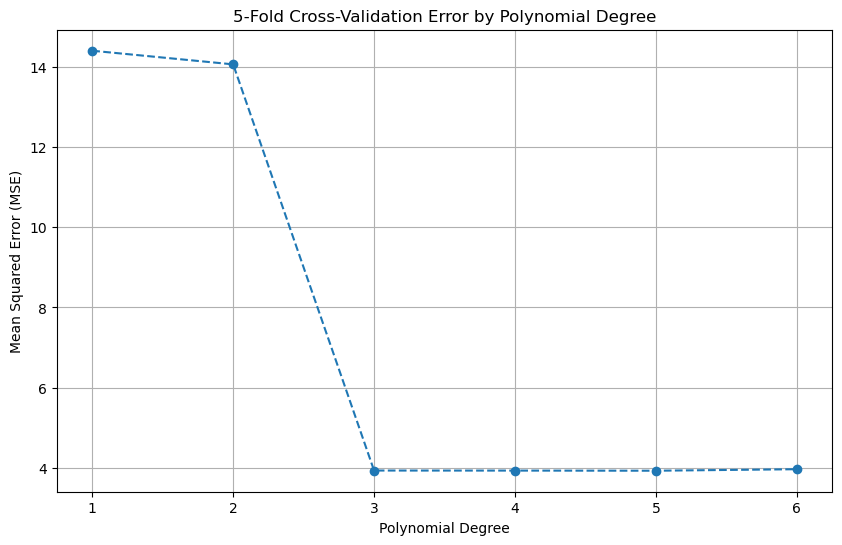


Best polynomial degree: 5


In [12]:
degrees = range(1, 7)
mse_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_toy)
    
    scores = -cross_val_score(LinearRegression(), X_poly, y_toy,
                            scoring='neg_mean_squared_error', cv=5)
    
    mse_scores.append(scores.mean())
    print(f"Degree {degree}: MSE = {scores.mean():.4f} (±{scores.std():.4f})")

plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_scores, marker='o', linestyle='--')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('5-Fold Cross-Validation Error by Polynomial Degree')
plt.xticks(degrees)
plt.grid(True)
plt.show()

best_degree = degrees[np.argmin(mse_scores)]
print(f"\nBest polynomial degree: {best_degree}")



-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.